In [1]:
import sys, os, pathlib
#setting the path to folder with modules
sys.path.insert(0, str(pathlib.Path(os.getcwd()).parents[1] / 'python'))
from Load_Datasets import *

In [2]:
FileAddress_movies ="../../Datasets/tmdb_5000_movies.csv"
FileAddress_credits="../../Datasets/tmdb_5000_credits.csv"

In [3]:
#Loading information about movies
Movies,Credentials  = Load_Datasets(FileAddress_movies,FileAddress_credits)

Drops = ['homepage','status','id']
for drop in Drops:
    Movies = Movies.drop(drop, 1)
        
Movies.to_csv("../../Datasets/Transformed.csv")
#print(Movies.dtypes)
#read arrays from string using string.split(",")

In [4]:
Movies.tail(5)

,budget,genres,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,...,genres_id,keywords_id,production_companies_id,actors,actors_id,actor_gender,crew_names,crew_names_id,crew_jobs,crew_departments
title,,,,,,,,,,,,,,,,,,,,,
[REC]²,5600000,"Thriller,Horror","religion and supernatural,blood sample,occult,...",es,[REC]²,"The action continues from [REC], with the medi...",22.341462,Filmax,Spain,2009-09-15,...,"53,27","3684,4035,156174,156788,159287,160194,160195,1...",3631,"Manuela Velasco,Ferran Terraza,Claudia Silva,J...","34793,54532,111091,111090,54520,54523,19824,11...","1,0,0,0,2,1,1,0,1,2,0,0,2","Jaume Balagueró,Jaume Balagueró,Paco Plaza,Pac...","54525,54525,54526,54526,126770","Screenplay,Director,Screenplay,Director,Screen...","Writing,Directing,Writing,Directing,Writing"
eXistenZ,15000000,"Action,Thriller,Science Fiction,Horror","video game,hacker,bodyguard,pop star,virtual r...",en,eXistenZ,A game designer on the run from assassins must...,21.928025,"Alliance Atlantis Communications,Natural Nylon...","Canada,France,United Kingdom",1999-04-14,...,"28,53,878,27","282,2157,3088,3490,4563,4565,5380","803,804,805,806,807,808,809,20170","Jennifer Jason Leigh,Jude Law,Ian Holm,Willem ...","10431,9642,65,5293,20173,20174,540,2040,98,201...","1,2,2,2,2,2,2,2,1,2,2,2,1,2,0,1,2","David Cronenberg,David Cronenberg,David Cronen...","224,224,224,307,307,310,117,2688,8315,11229,13...","Director,Screenplay,Producer,Director of Photo...","Directing,Writing,Production,Camera,Camera,Edi..."
xXx,70000000,"Action,Adventure,Thriller","sports car,biological weapon,cold war,russian,...",en,xXx,Xander Cage is your standard adrenaline junkie...,46.217769,"Columbia Pictures,Original Film,Revolution Stu...",United States of America,2002-08-09,...,"28,12,53","999,1865,2106,2808,3530,10364,10456,217142,234...","5,333,497","Vin Diesel,Asia Argento,Samuel L. Jackson,Dann...","12835,18514,2231,11160,65240,20982,53347,2341,...","2,1,2,2,1,2,0,0,2,2,2,2,0,2,2,2,2,0,2,0","Ronna Kress,Chris Lebenzon,Paul Rubell,Sanja M...","1720,541,10816,2519,4501,4854,4856,10631,10632...","Casting,Editor,Editor,Costume Design,Director ...","Production,Editing,Editing,Costume & Make-Up,C..."
xXx: State of the Union,60000000,"Action,Adventure,Crime,Drama,Mystery,Thriller","washington d.c.,helicopter,usa president,gener...",en,xXx: State of the Union,"Ice Cube stars as Darius Stone, a thrill-seeki...",36.689223,"Original Film,Columbia Pictures Corporation,Re...",United States of America,2005-04-27,...,"28,12,80,18,9648,53","521,720,840,1402,6285,9358,9610,33705,160992,1...","333,441,497","Ice Cube,Samuel L. Jackson,Willem Dafoe,Scott ...","9778,2231,5293,100,21368,336,53347,58707,18286...","2,2,2,2,2,2,0,1,1,2,2,2,0,2,0","Mark Goldblatt,Christopher Boyes,Bill Abbott,S...","898,900,1305,2484,2519,7229,10631,6347,6800,72...","Editor,Sound Designer,Music Editor,Editor,Cost...","Editing,Sound,Sound,Editing,Costume & Make-Up,..."
Æon Flux,62000000,"Action,Science Fiction","martial arts,dystopia,surrealism,based on cart...",en,Æon Flux,"400 years into the future, disease has wiped o...",29.954302,"Paramount Pictures,Lakeshore Entertainment,MTV...",United States of America,2005-11-30,...,"28,878","779,4565,9887,10244,10950,11134,11829,12190,14...","4,126,746,6041,11533,11534","Charlize Theron,Marton Csokas,Jonny Lee Miller...","6885,20982,9012,2598,3910,4935,23496,25448,198...","1,2,2,1,1,2,1,1,2,2,1,1,2,2,0,2,1,2,2,0,0,0,0,...","Tom Rosenberg,Gale Anne Hurd,Graeme Revell,Gar...","68602,869,5912,3953,6875,7262,10969,10903,1090...","Executive Producer,Producer,Original Music Com...","Production,Production,Sound,Production,Editing..."


Here we will present distributions of different features of the movies, i.e. movies budget, revenue, average vote, vote counts, popularity, number of actors and number of movies cast.

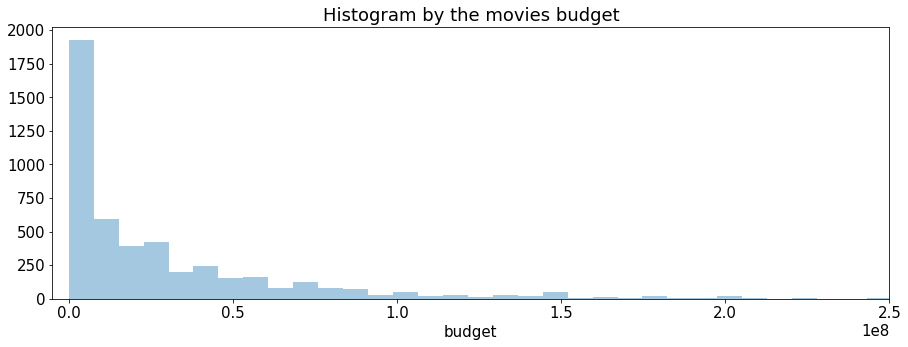

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
% matplotlib inline
fontsizes = 15
matplotlib.rcParams.update({'font.size': fontsizes})
fig, axes = plt.subplots(figsize=(15, 5))


g = sns.distplot(Movies['budget'], kde=False, rug=False)
plt.xlim(-0.05*1e8,2.5*1e8) 
g.set(title='Histogram by the movies budget')
plt.show()

We can notice the distribution of budget is tailed, there is a lot of movies with low budget less than $10^{7}$, and a small number of movies with budget grater than  $10^{7}$

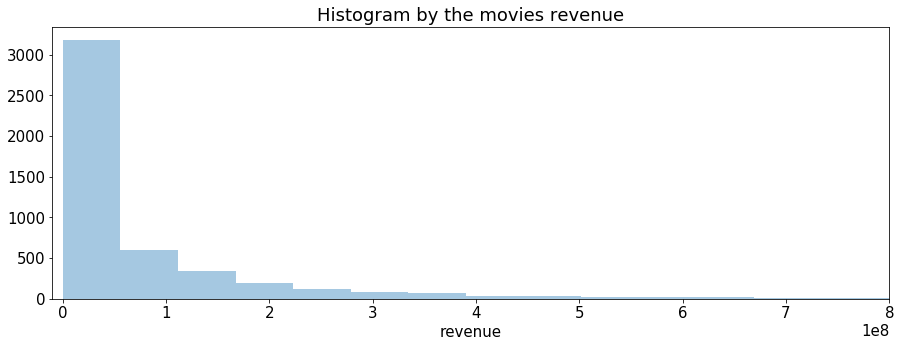

In [6]:
fig, axes = plt.subplots(figsize=(15, 5))

g = sns.distplot(Movies['revenue'], kde=False, rug=False)
plt.xlim(-0.1*1e8, 8*1e8) 
g.set(title='Histogram by the movies revenue')
plt.show()

The revenue of the movie has usually value less than $10^{8}$, the its distribution is haevily tailed, and the range of movies revenue is from $(0, 8*10^{8})$

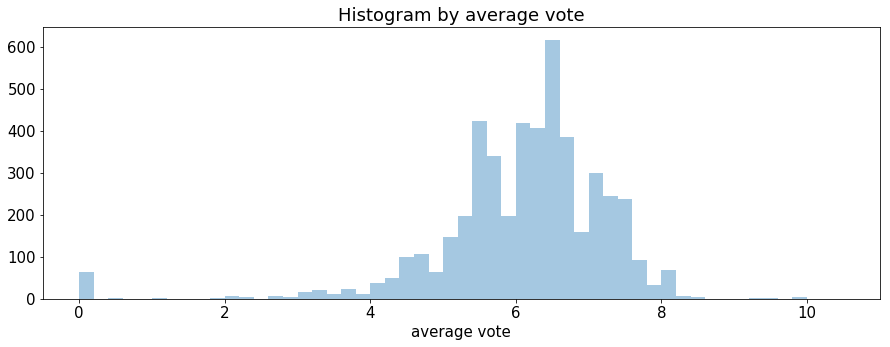

In [7]:
fig, axes = plt.subplots(figsize=(15, 5))

g = sns.distplot(Movies['vote_average'], kde=False, rug=False)
plt.xlim(-0.5,11)
g.set(title='Histogram by average vote', xlabel = "average vote")
plt.show()

The most frequent vote is less than 7. There is a lot of movies with vote 0, so it could be that 0 is sign that movie has not given the vote

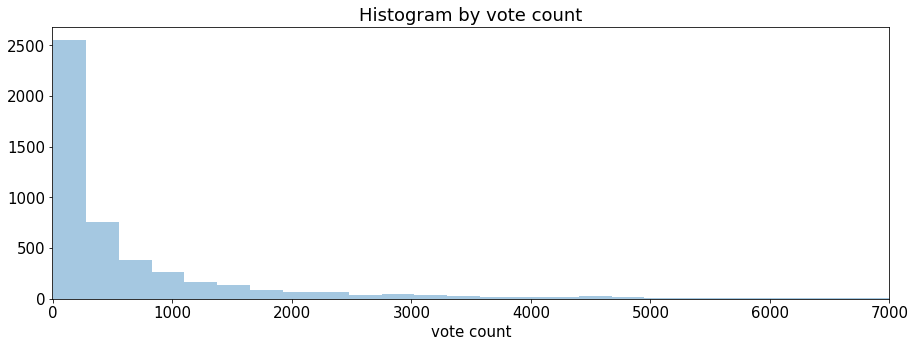

In [8]:
fig, axes = plt.subplots(figsize=(15, 5))

g = sns.distplot(Movies['vote_count'], kde=False, rug=False)
plt.xlim(-5,7000)
g.set(title='Histogram by vote count', xlabel = "vote count")
plt.show()

Distribution of vote count is tailed, usually movies has less than 200 votes, and vast majority has less than 1000 votes

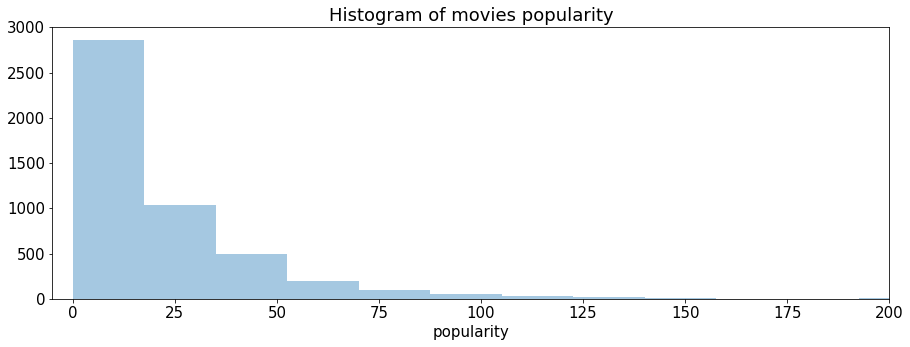

In [9]:
fig, axes = plt.subplots(figsize=(15, 5))

g = sns.distplot(Movies['popularity'], kde=False, rug=False )
plt.xlim(-5,200) 
g.set(title='Histogram of movies popularity')
plt.show()

A lot of movies has a low popularity, it seems like 0 popularity is when movie has not given the popularity data 

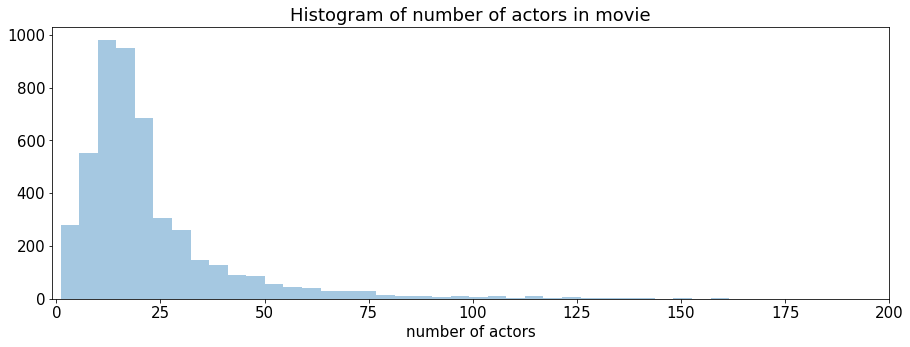

In [10]:
num_of_elements = lambda x: len(x.split(","))
num_of_actors = Movies["actors_id"].apply(num_of_elements)

fig, axes = plt.subplots(figsize=(15, 5))

g = sns.distplot(num_of_actors, kde=False, rug=False )
plt.xlim(-1,200) 
g.set(title='Histogram of number of actors in movie', xlabel = "number of actors")
plt.show()

The number of actors in the movie most frequently between 10-25, and just a couple of movies has more then 100 actors

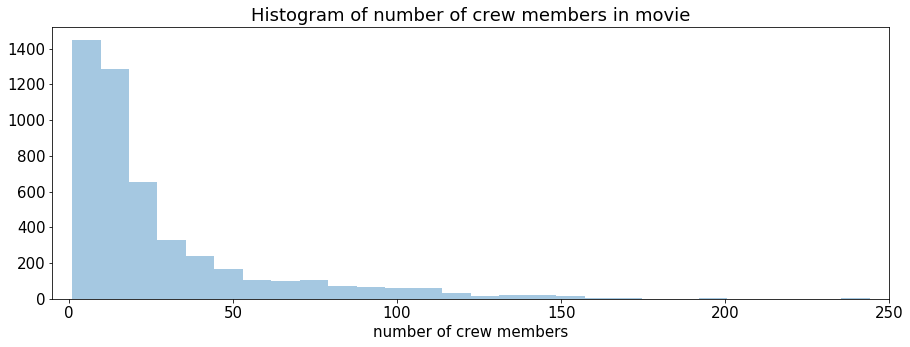

In [11]:
num_of_crew = Movies["crew_names_id"].apply(num_of_elements)

fig, axes = plt.subplots(figsize=(15, 5))

g = sns.distplot(num_of_crew, kde=False, rug=False )
plt.xlim(-5,250) 
g.set(title='Histogram of number of crew members in movie', xlabel = "number of crew members")
plt.show()

The number of crew members is most times less than 50, and there is some movie up to 200 crew members. It is more frequent to have cast larger than 50 crew members, than 50 actors which is expected

Now, we will find the most frequent keywords, crew members, production companies, actors and genres:

In [12]:
keywords_dict = {}

for i in range(len(Movies)):
    if(len(Movies.iloc[i]["keywords"])>0):
        for j in range(len(Movies.iloc[i]["keywords"].split(","))):
            if (len(Movies.iloc[i]["keywords"].split(","))>0):
                keyword = Movies.iloc[i]["keywords"].split(",")[j]
                keywords_dict[keyword] = keywords_dict.get(keyword, 0) + 1

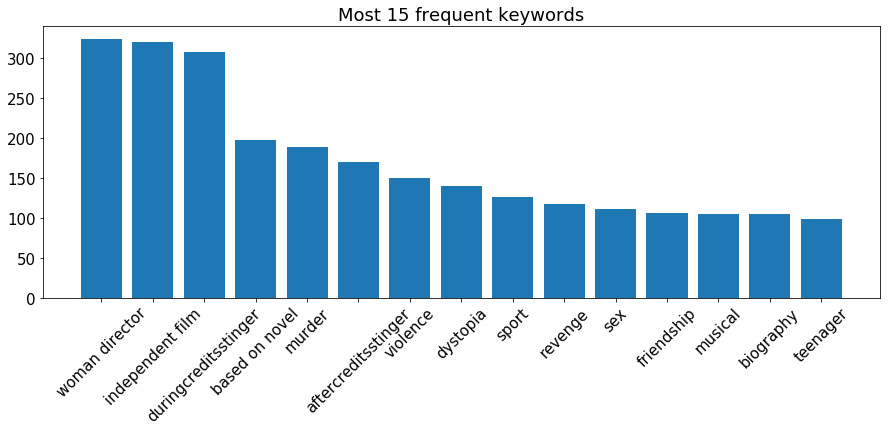

In [13]:
how_much_keywords = 15
most_freq_keywords = sorted(keywords_dict, key=keywords_dict.get)[-how_much_keywords:]

fig, ax = plt.subplots(figsize=(15,5))

freq_key_plot = [keywords_dict[most_freq_keywords[len(most_freq_keywords)-1-i]] for i in range(how_much_keywords)]
plt.bar(range(how_much_keywords), freq_key_plot)
plt.title("Most {} frequent keywords".format(how_much_keywords))
plt.xticks(range(how_much_keywords),(most_freq_keywords[::-1]), fontsize=15, rotation=45)
plt.show()

We can see that some words are very frequent in keywords . Woman director is most used keyword, and having in mind that we have nearly 4800 movies, the women director shows up as keyword in nearly 7% of movies

In [14]:
crew_names_dict = {}

for i in range(len(Movies)):
    if(len(Movies.iloc[i]["crew_names"])>0):
        for j in range(len(Movies.iloc[i]["crew_names"].split(","))):
            if (len(Movies.iloc[i]["crew_names"].split(","))>0):
                crew = Movies.iloc[i]["crew_names"].split(",")[j]
                crew_names_dict[crew] = crew_names_dict.get(crew, 0) + 1

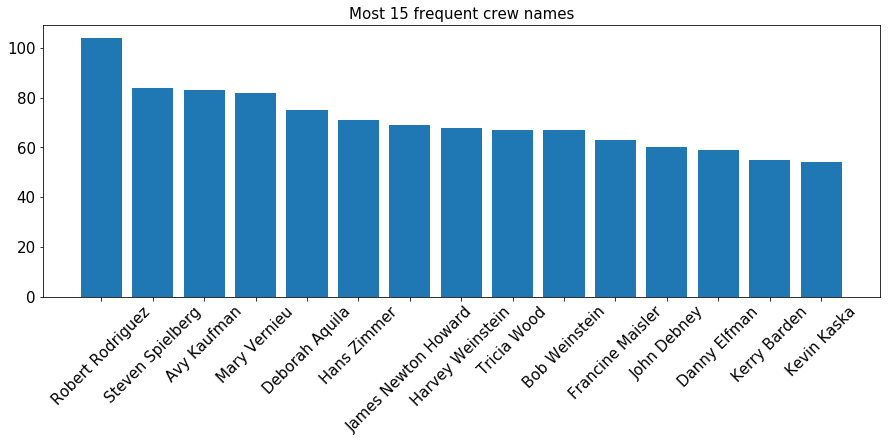

In [15]:
how_much_crew = 15
most_freq_crew = sorted(crew_names_dict, key=crew_names_dict.get)[-how_much_crew:]

fig, ax = plt.subplots(figsize=(15,5))

freq_crew_plot = [crew_names_dict[most_freq_crew[len(most_freq_crew)-1-i]] for i in range(how_much_crew)]
plt.bar(range(how_much_crew), freq_crew_plot)
fontsizes = 15
rot = 45
plt.rc('axes', titlesize=fontsizes, )
plt.title("Most 15 frequent crew names")
plt.xticks(range(how_much_crew),(most_freq_crew[::-1]), rotation=rot)
plt.show()

Here are shown the most frequent 15 crew names. Most working crew member is Robert Rodriguez with more than 100 movies, and the next member has been in nealry 80 movies. After these names, the number of different crew's movies slowly decrease form 80 to 60

In [16]:
production_name_id_dict = {}
freq_production_ids = {}

for i in range(len(Movies)):
    for j in range(len(Movies.iloc[i]["production_companies_id"].split(","))):
        if (len(Movies.iloc[i]["production_companies_id"].split(",")[j])>0):
            production_id_int_key = int(Movies.iloc[i]["production_companies_id"].split(",")[j])
            freq_production_ids[production_id_int_key] = freq_production_ids.get(production_id_int_key, 0) + 1
            production_name_id_dict[production_id_int_key] = Movies.iloc[i]["production_companies"].split(",")[j]

In [17]:
how_much_production = 15; 
most_freq_ids = sorted(freq_production_ids, key=freq_production_ids.get)[-how_much_production:]
most_freq_production = [production_name_id_dict[key] if ((production_name_id_dict[key]!="Twentieth Century Fox Film Corporation") & (production_name_id_dict[key]!="Columbia Pictures Corporation")) else "Columbia Pictures" if (production_name_id_dict[key]=="Columbia Pictures Corporation") else "20th Century" for key in most_freq_ids]

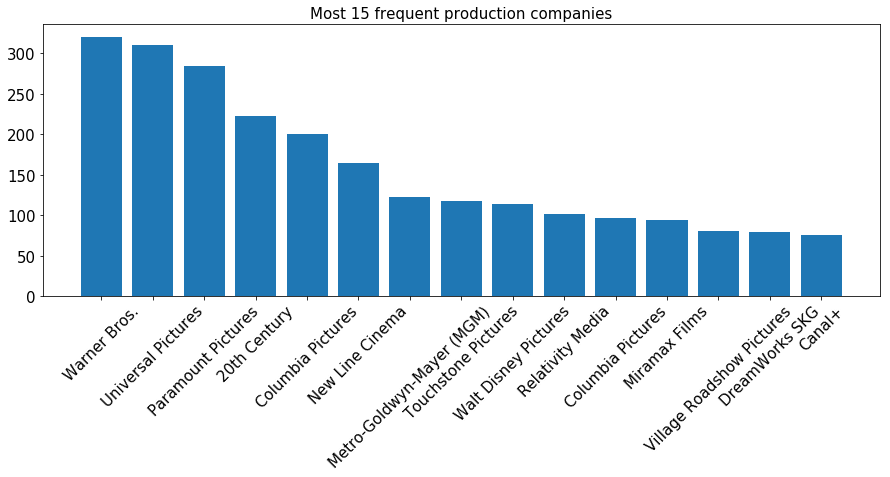

In [18]:
fig, ax = plt.subplots(figsize=(15,5))

freq_production_plot = [freq_production_ids[most_freq_ids[how_much_production-i-1]] for i in range(how_much_production)]
plt.bar(range(how_much_production), freq_production_plot)
plt.title("Most {} frequent production companies".format(how_much_production))
plt.xticks(range(how_much_production),(most_freq_production[::-1]), rotation=rot)
plt.show()

Here are shown 15 most frequent production companies. The first three companies has made around 300 movies each which is nearly 20% of all the movies. The next three companies has made more than 150 movies each, and they are followed by the rest top companies who made 100 movies on average. 

It seems like we have dominant production companies: Warner Bros. Universal Pictures and Paramount Pictures

In [19]:
actors_name_id_dict = {}
freq_actors_ids = {}

for i in range(len(Movies)):
    for j in range(len(Movies.iloc[i]["actors_id"].split(","))):
        if (len(Movies.iloc[i]["actors_id"].split(",")[j])>0):
            actor_id_int_key = int(Movies.iloc[i]["actors_id"].split(",")[j])
            freq_actors_ids[actor_id_int_key] = freq_actors_ids.get(actor_id_int_key, 0) + 1
            actors_name_id_dict[actor_id_int_key] = Movies.iloc[i]["actors"].split(",")[j]

In [20]:
how_much_actors = 15; 
most_freq_ids = sorted(freq_actors_ids, key=freq_actors_ids.get)[-how_much_actors:]
most_freq_actors = [actors_name_id_dict[key] for key in most_freq_ids]

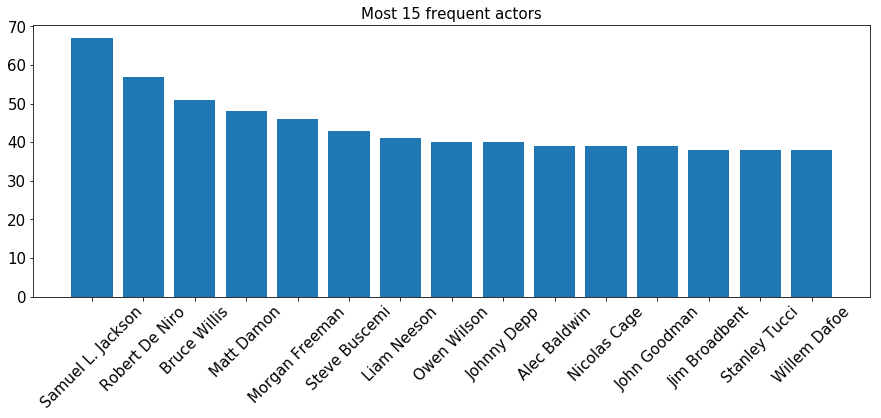

In [21]:
fig, ax = plt.subplots(figsize=(15,5))

freq_actors_plot = [freq_actors_ids[most_freq_ids[how_much_actors-i-1]] for i in range(how_much_actors)]
plt.bar(range(how_much_actors), freq_actors_plot)
plt.title("Most {} frequent actors".format(how_much_actors))
plt.xticks(range(how_much_actors),(most_freq_actors[::-1]), rotation=rot)
plt.show()

Here are shown 15 most frequent actors. All of them has shown up in more than 40 movies.
The most frequent actor Samuel L. Jaskson has been in nearly 70 movies, after the distribution of the top actors slowly decrease

In [22]:
genres_dict = {}

for i in range(len(Movies)):
    if(len(Movies.iloc[i]["genres"])>0):
        for j in range(len(Movies.iloc[i]["genres"].split(","))):
            if (len(Movies.iloc[i]["genres"].split(","))>0):
                genre = Movies.iloc[i]["genres"].split(",")[j]
                genres_dict[genre] = genres_dict.get(genre, 0) + 1

In [23]:
how_much_genres = 15
most_freq_genres = sorted(genres_dict, key=genres_dict.get)[-how_much_genres:]

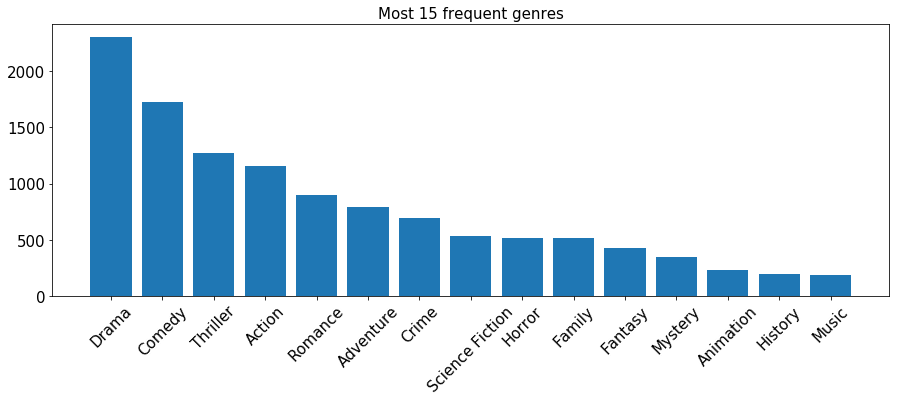

In [24]:
fig, ax = plt.subplots(figsize=(15,5))
fontsizes = 15
rot = 45

freq_genres_plot = [genres_dict[most_freq_genres[len(most_freq_genres)-1-i]] for i in range(how_much_genres)]
plt.bar(range(how_much_genres), freq_genres_plot)
plt.title("Most {} frequent genres".format(how_much_genres))
plt.xticks(range(how_much_genres),(most_freq_genres[::-1]), fontsize = fontsizes, rotation = rot)
plt.show()

Drama, Comedy and Thriller are most frequent genres. It seems like more than 40% movies has drama in its genre description